In [1]:
# importing the library
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset/data_salary_cleaned.csv', index_col='index')

In [3]:
df.head(3)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Avg_salary,Python_req,RStudio_req,Spark_req,Aws_req,Excel_req,Company_nm,Job_state,Same_state,Age
index,,,,,,,,,,,,,,,,,,,,,
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,...,146.0,0,0,0,0,0,Hopper,NY,0,15
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,...,146.0,1,0,0,0,1,Noom US,NY,1,14
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,0.0,Decode_M,"New York, NY","New York, NY",1 to 50 employees,0,Na,...,146.0,1,0,0,0,1,Decode_M,NY,1,0


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'job_cat', 'entry_level', 'hourly', 'min_salary',
       'max_salary', 'Avg_salary', 'Python_req', 'RStudio_req', 'Spark_req',
       'Aws_req', 'Excel_req', 'Company_nm', 'Job_state', 'Same_state', 'Age'],
      dtype='object')

In [5]:
def job_cat(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'Data Engineer'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'business' in title.lower():
        return 'business i/da'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

In [6]:
df['Job_Title'] = df['Job Title'].apply(job_cat)

In [7]:
df['Job_Title'].value_counts()

na                  1094
data scientist       984
data analyst         747
Data Engineer        742
machine learning     140
business i/da         95
manager               72
director              35
Name: Job_Title, dtype: int64

In [8]:
def seniority(level):
    if 'senior' in level.lower() or 'sr' in level.lower() or 'principal' in level.lower():
        return 'senior'
    elif 'lead' in level.lower():
        return 'team lead'
    elif 'junior' in level.lower():
        return 'junior'
    else:
        return 'na'

In [9]:
df.entry_level = df['Job Title'].apply(seniority)

In [10]:
df.entry_level.value_counts()

na           2971
senior        794
team lead     109
junior         35
Name: entry_level, dtype: int64

In [11]:
df.drop(columns=['Job Title', 'Salary Estimate', 'Company Name', 'job_cat', 'Easy Apply'], inplace=True, axis=1)

In [12]:
df.columns

Index(['Job Description', 'Rating', 'Location', 'Headquarters', 'Size',
       'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'entry_level', 'hourly', 'min_salary', 'max_salary',
       'Avg_salary', 'Python_req', 'RStudio_req', 'Spark_req', 'Aws_req',
       'Excel_req', 'Company_nm', 'Job_state', 'Same_state', 'Age',
       'Job_Title'],
      dtype='object')

In [13]:
df.rename(columns={
    "Job_Title": "Job Title",
    "entry_level": "Entry Level",
    "Avg_salary": "Average Salary ($ 000)",
    "Company_nm": "Company Name",
    "Job_state": "Job State",
 }, inplace=True)

In [14]:
df.head(3)

,Job Description,Rating,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,...,Python_req,RStudio_req,Spark_req,Aws_req,Excel_req,Company Name,Job State,Same_state,Age,Job Title
index,,,,,,,,,,,,,,,,,,,,,
0,"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007,Company - Private,Travel Agencies,Travel & Tourism,Others,...,0,0,0,0,0,Hopper,NY,0,15,data scientist
1,"At Noom, we use scientifically proven methods ...",4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008,Company - Private,"Health, Beauty, & Fitness",Consumer Services,Others,...,1,0,0,0,1,Noom US,NY,1,14,data scientist
2,Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,0.0,"New York, NY","New York, NY",1 to 50 employees,0,Na,Others,Others,Others,...,1,0,0,0,1,Decode_M,NY,1,0,manager


In [15]:
df.columns

Index(['Job Description', 'Rating', 'Location', 'Headquarters', 'Size',
       'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'Entry Level', 'hourly', 'min_salary', 'max_salary',
       'Average Salary ($ 000)', 'Python_req', 'RStudio_req', 'Spark_req',
       'Aws_req', 'Excel_req', 'Company Name', 'Job State', 'Same_state',
       'Age', 'Job Title'],
      dtype='object')

In [16]:
# Funtion to display feature count plot and feature vs. average salary bar plot
def count_n_avg_salary(col1, col2):
    fig, ax = plt.subplots(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    ax = sns.countplot(x=col1,
                       data=df,
                       palette='Dark2',
                       order=df[col1].value_counts().index[:50])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.bar_label(ax.containers[0])
    plt.title('Number of Jobs by {0}'.format(col1))
    
    plt.subplot(1, 2, 2)
    ax = sns.barplot(x=col1,
                     y=col2,
                     data=df,
                     palette='Dark2',
                     order=df[col1].value_counts().index[:50],
                     ci=False)
    plt.xticks(rotation=90)
    ax.bar_label(ax.containers[0])
    plt.title('Average salary of jobs by {0}'.format(col1))
    plt.show()

#### EDA on Company Name 

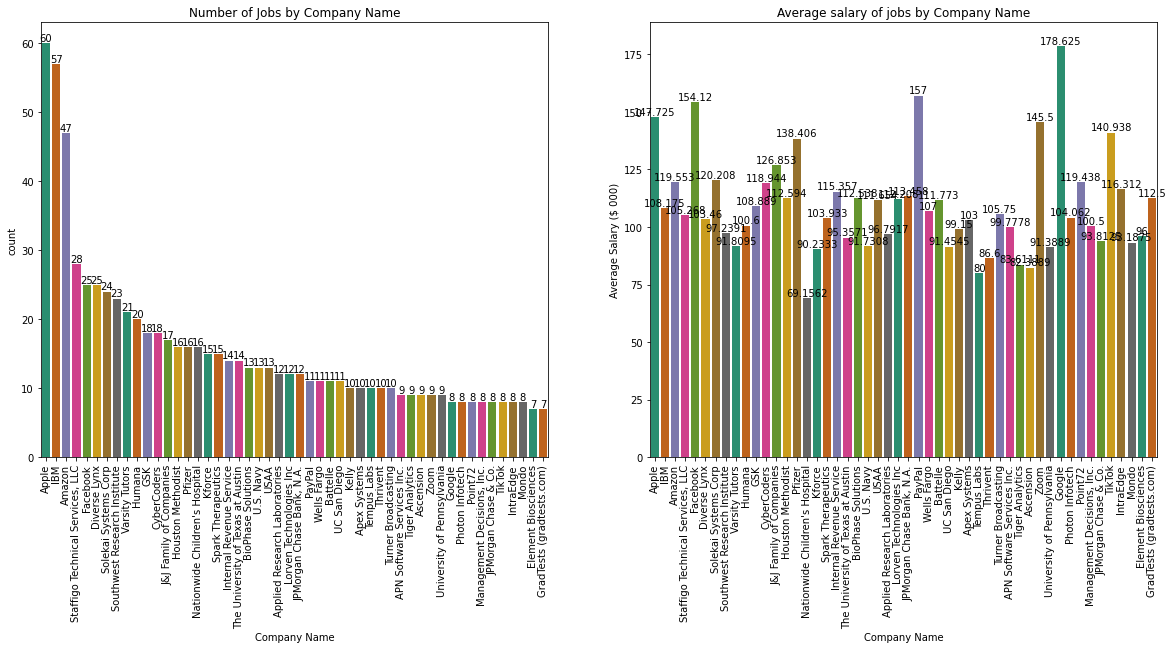

In [17]:
count_n_avg_salary('Company Name', 'Average Salary ($ 000)')

#### EDA on Lcation

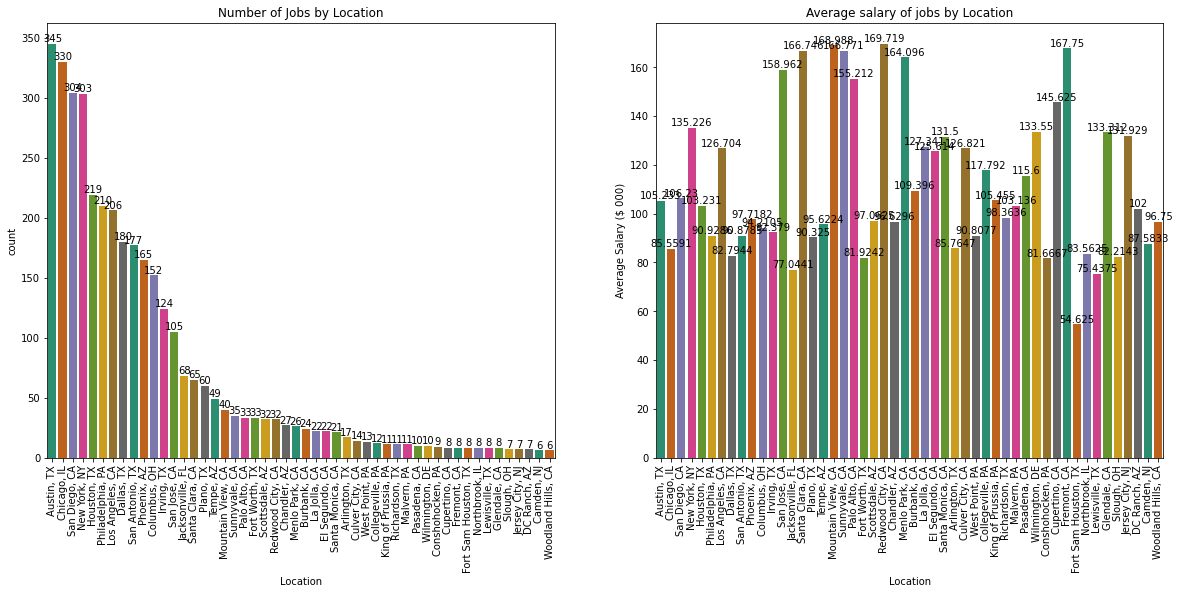

In [18]:
count_n_avg_salary('Location', 'Average Salary ($ 000)')

#### EDA on Headquarters

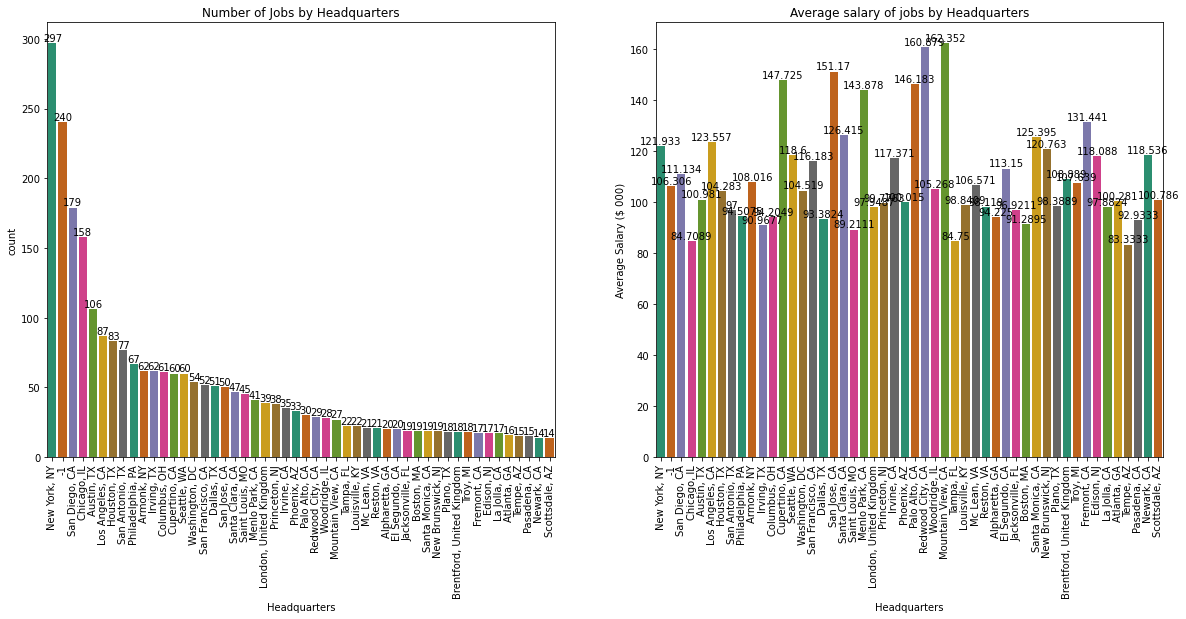

In [19]:
count_n_avg_salary('Headquarters', 'Average Salary ($ 000)')

#### EDA on Size Of The Comapny

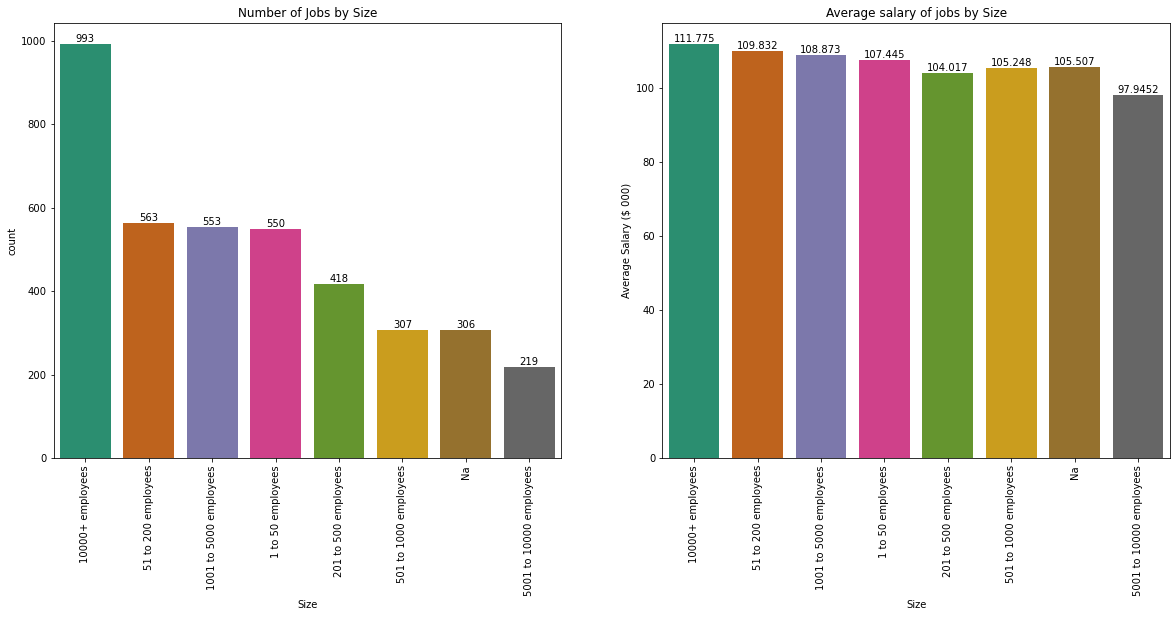

In [20]:
count_n_avg_salary('Size', 'Average Salary ($ 000)')

In [21]:
df.columns

Index(['Job Description', 'Rating', 'Location', 'Headquarters', 'Size',
       'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'Entry Level', 'hourly', 'min_salary', 'max_salary',
       'Average Salary ($ 000)', 'Python_req', 'RStudio_req', 'Spark_req',
       'Aws_req', 'Excel_req', 'Company Name', 'Job State', 'Same_state',
       'Age', 'Job Title'],
      dtype='object')

#### EDA on Type of Ownership 

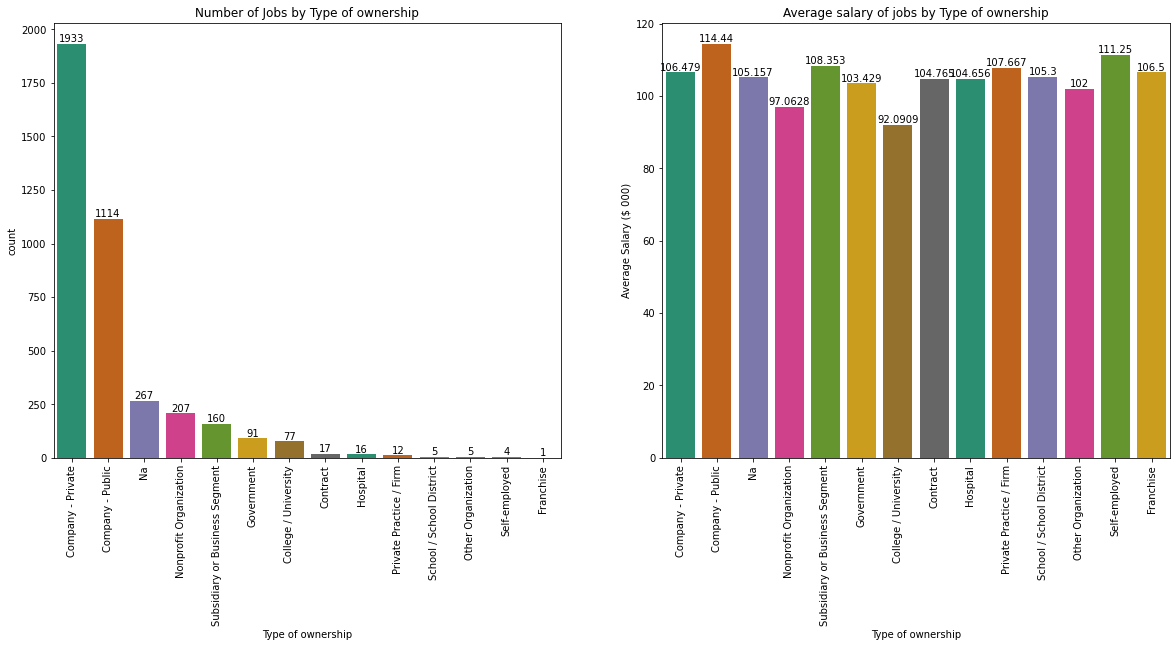

In [22]:
count_n_avg_salary('Type of ownership', 'Average Salary ($ 000)')

#### EDA on Industry

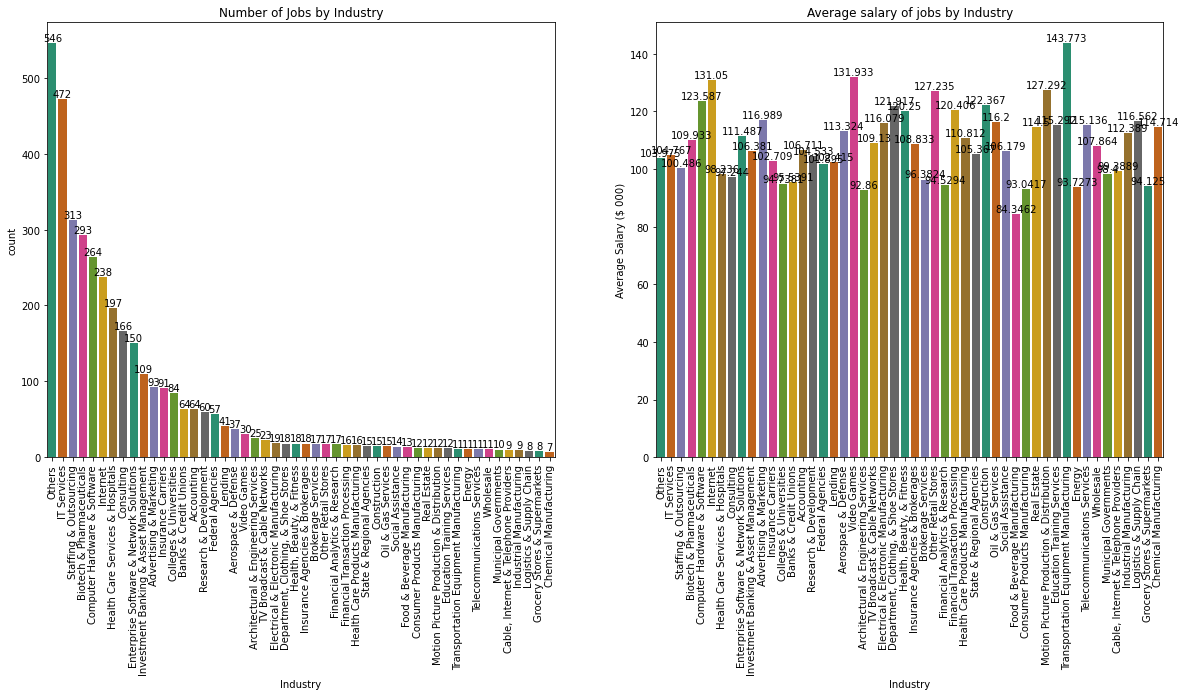

In [23]:
count_n_avg_salary('Industry', 'Average Salary ($ 000)')

#### EDA on Revenue

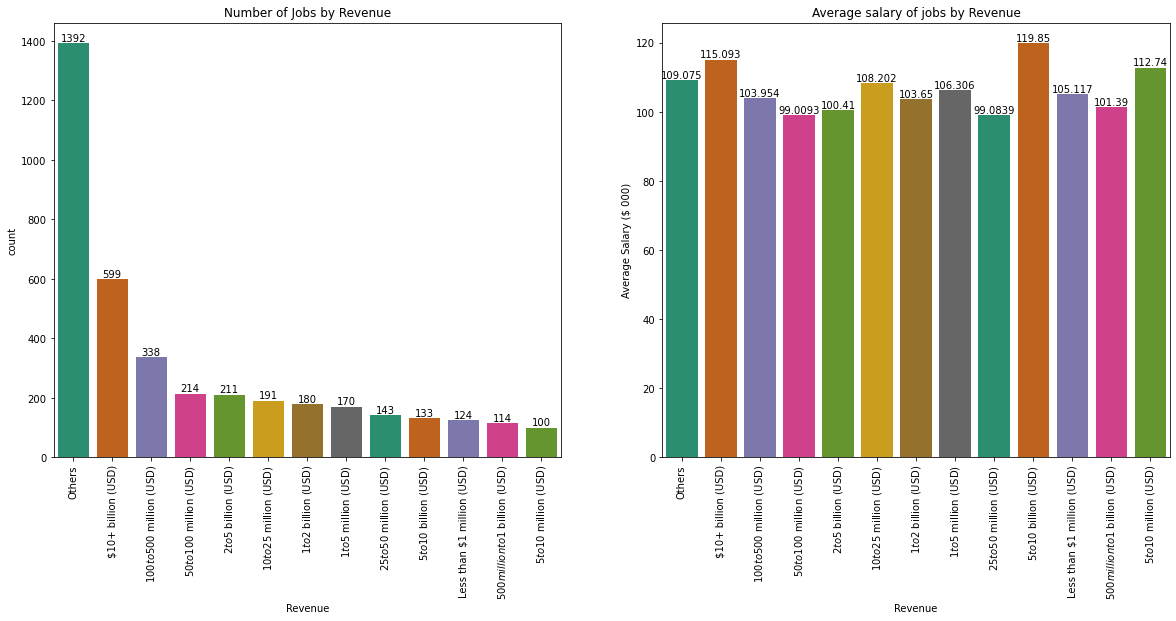

In [24]:
count_n_avg_salary('Revenue', 'Average Salary ($ 000)')

#### EDA on Rating

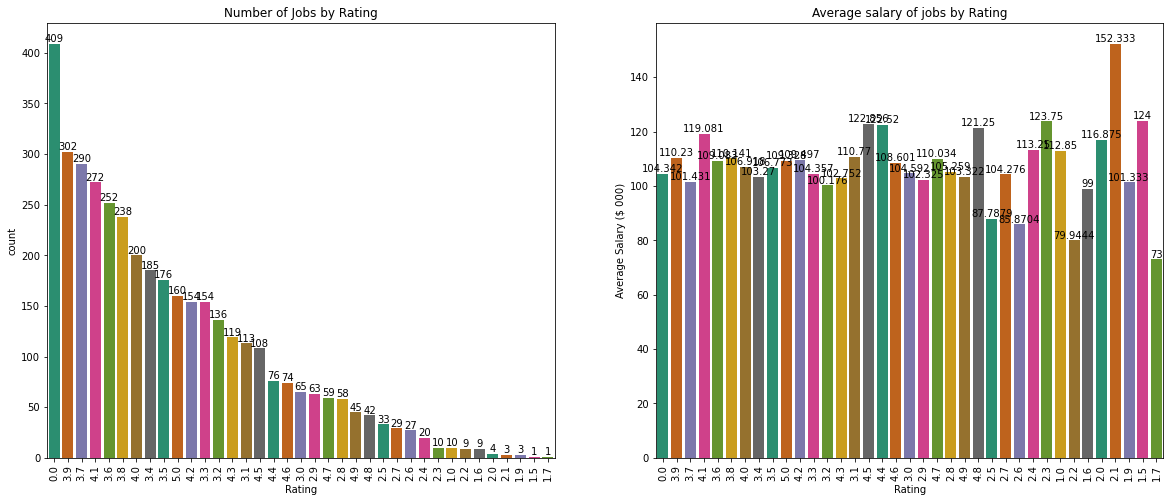

In [25]:
count_n_avg_salary('Rating', 'Average Salary ($ 000)')

#### EDA On Age Of The Comapny

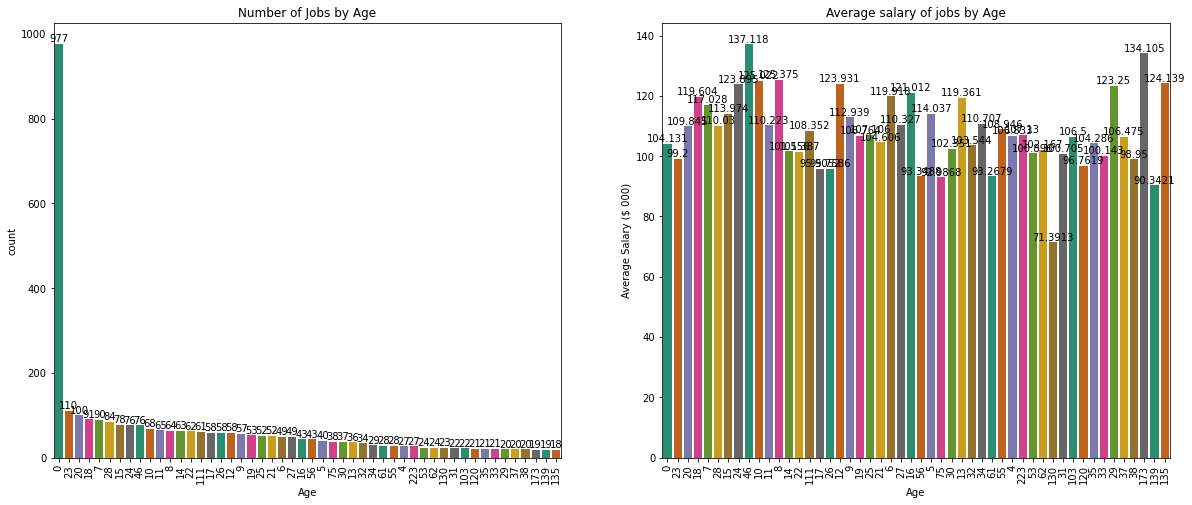

In [26]:
count_n_avg_salary('Age', 'Average Salary ($ 000)')

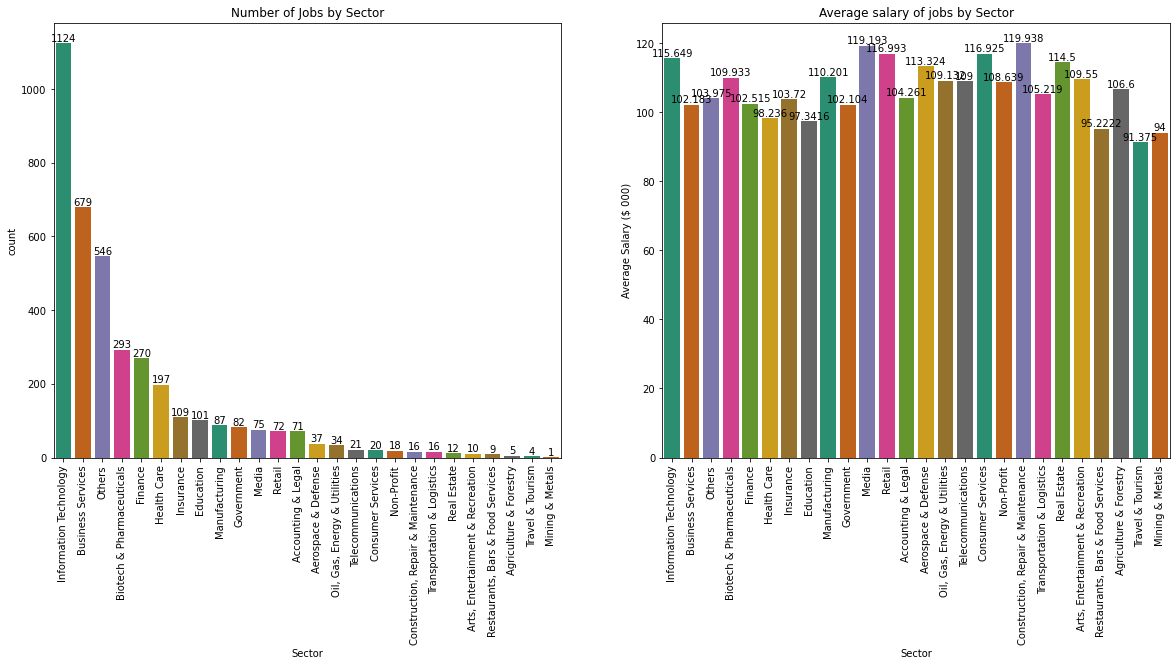

In [27]:
count_n_avg_salary('Sector', 'Average Salary ($ 000)')

In [29]:
def skill_count_n_avg_salary(col1, col2, col3, col4, col5, col6):
    fig, ax = plt.subplots(figsize=(20, 8))
    plt.subplot(2 ,5, 1)
    ax = sns.countplot(x=col1,
                      data=df,
                      palette='Dark2',
                      order=df[col1].value_counts().index)
    ax.bar_label(ax.containers[0])
    plt.title(col1)
    
    plt.subplot(2 ,5, 2)
    ax = sns.countplot(x=col2,
                      data=df,
                      palette='Dark2',
                      order=df[col2].value_counts().index)
    ax.bar_label(ax.containers[0])
    plt.title(col2)
    
    plt.subplot(2 ,5, 3)
    ax = sns.countplot(x=col3,
                      data=df,
                      palette='Dark2',
                      order=df[col3].value_counts().index)
    ax.bar_label(ax.containers[0])
    plt.title(col3)
    
    plt.subplot(2 ,5, 4)
    ax = sns.countplot(x=col4,
                      data=df,
                      palette='Dark2',
                      order=df[col4].value_counts().index)
    ax.bar_label(ax.containers[0])
    plt.title(col4)
    
    plt.subplot(2 ,5, 5)
    ax = sns.countplot(x=col5,
                      data=df,
                      palette='Dark2',
                      order=df[col5].value_counts().index)
    ax.bar_label(ax.containers[0])
    plt.title(col5)
    
    plt.subplot(2 ,5, 6)
    ax = sns.barplot(x=col1,
                     y=col6,
                      data=df,
                      palette='Dark2',
                      order=df[col1].value_counts().index)
    ax.bar_label(ax.containers[0])
    
    
    plt.subplot(2 ,5, 7)
    ax = sns.barplot(x=col2,
                     y=col6,
                      data=df,
                      palette='Dark2',
                      order=df[col2].value_counts().index)
    ax.bar_label(ax.containers[0])
    
    
    plt.subplot(2 ,5, 8)
    ax = sns.barplot(x=col3,
                       y=col6,
                      data=df,
                      palette='Dark2',
                      order=df[col3].value_counts().index)
    ax.bar_label(ax.containers[0])
    
    
    plt.subplot(2 ,5, 9)
    ax = sns.barplot(x=col4,
                     y=col6,
                      data=df,
                      palette='Dark2',
                      order=df[col4].value_counts().index)
    ax.bar_label(ax.containers[0])
    
    
    plt.subplot(2 ,5, 10)
    ax = sns.barplot(x=col5,
                       y=col6,
                      data=df,
                      palette='Dark2',
                      order=df[col5].value_counts().index)
    ax.bar_label(ax.containers[0])
    plt.show()

In [30]:
df.columns

Index(['Job Description', 'Rating', 'Location', 'Headquarters', 'Size',
       'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'Entry Level', 'hourly', 'min_salary', 'max_salary',
       'Average Salary ($ 000)', 'Python_req', 'RStudio_req', 'Spark_req',
       'Aws_req', 'Excel_req', 'Company Name', 'Job State', 'Same_state',
       'Age', 'Job Title'],
      dtype='object')

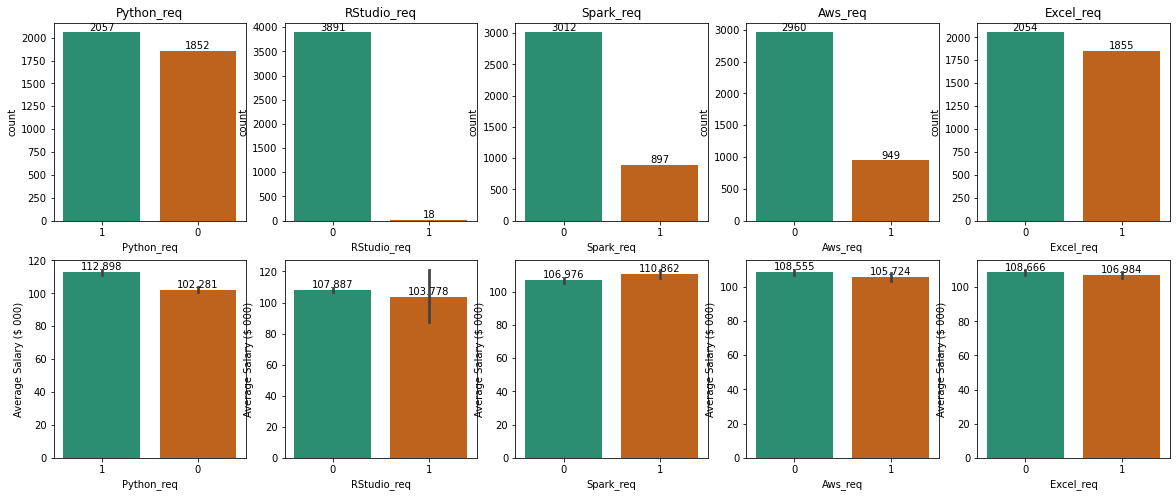

In [31]:
skill_count_n_avg_salary('Python_req', 'RStudio_req', 'Spark_req', 'Aws_req', 'Excel_req', 'Average Salary ($ 000)')

<AxesSubplot:ylabel='Job Title'>

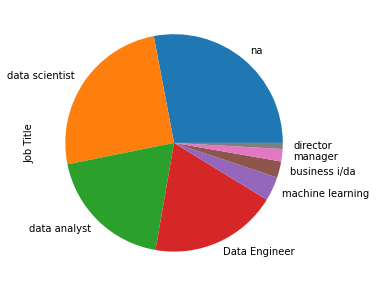

In [32]:
df['Job Title'].value_counts().plot(kind='pie', figsize=(15, 5))

In [33]:
pd.pivot_table(df, index=['Job State', 'Company Name'], values='Average Salary ($ 000)').sort_values('Average Salary ($ 000)', ascending=False)

Average Salary ($ 000)
Job State Company Name                                              
 CA       Edelman Financial Engines                           225.00
          Appen                                               225.00
          Earnin                                              225.00
          Bandai Namco Entertainment America                  225.00
          Aisera                                              225.00
...                                                              ...
 TX       University Health System                             40.75
          BB&E, Inc.                                           22.00
          BioBridge Global                                     22.00
          KCI Licensing                                        22.00
          Spectrum Comm                                        22.00

[2446 rows x 1 columns]

In [34]:
pd.pivot_table(df, index='Rating', values='Average Salary ($ 000)').sort_values(by='Average Salary ($ 000)', ascending=False)

,Average Salary ($ 000)
Rating,
2.1,152.333333
1.5,124.000000
2.3,123.750000
4.5,122.856481
4.4,122.519737
4.8,121.250000
4.1,119.080882
2.0,116.875000
2.4,113.250000


In [41]:
pd.pivot_table(df, index=['Job Title', 'Entry Level'], values='Average Salary ($ 000)').sort_values(by='Average Salary ($ 000)', ascending=False)

Average Salary ($ 000)
Job Title        Entry Level                        
Data Engineer    junior                   137.250000
data scientist   senior                   126.624101
machine learning na                       125.400862
data scientist   team lead                124.438776
                 na                       123.777182
director         senior                   123.100000
manager          senior                   112.444444
machine learning team lead                111.500000
manager          na                       108.698413
Data Engineer    team lead                107.947368
na               senior                   106.126147
Data Engineer    senior                   102.598592
data analyst     na                       102.373534
                 junior                   102.222222
                 senior                   100.676190
Data Engineer    na                       100.246114
business i/da    na                        99.816456
na               na                        99.793326
machine learning senior                    99.543478
data scientist   junior                    98.625000
business i/da    team lead                 96.750000
na               team lead                 96.475000
director         na                        95.933333
na               junior                    94.500000
data analyst     team lead                 93.222222
business i/da    senior                    86.750000

In [37]:
pd.set_option('display.max_rows', None)

In [45]:
pd.pivot_table(df, index=['Job State', 'Job Title', 'Entry Level'], values='Average Salary ($ 000)').sort_values(by='Job State')

Average Salary ($ 000)
Job State Job Title        Entry Level                        
 AZ       Data Engineer    na                        94.356061
          na               team lead                111.000000
                           senior                    84.000000
                           na                        95.754717
          manager          senior                    99.250000
          machine learning na                        76.700000
          director         senior                   128.000000
                           na                       104.000000
          data scientist   team lead                128.000000
          manager          na                        80.166667
          data scientist   na                       116.871429
          data analyst     senior                    89.416667
                           na                        93.722222
                           junior                    63.000000
          business i/da    senior                    63.000000
                           na                        96.142857
          Data Engineer    team lead                 86.600000
                           senior                   101.250000
          data scientist   senior                   107.277778
 CA       director         na                       114.416667
                           senior                   141.000000
          machine learning na                       150.188679
                           senior                   133.142857
          na               team lead                 97.000000
          manager          senior                   129.875000
          na               na                       117.632296
                           senior                   127.162338
          data scientist   team lead                135.125000
          manager          na                       128.750000
          data scientist   senior                   152.040000
          Data Engineer    team lead                148.500000
          data scientist   junior                   133.000000
          data analyst     team lead                133.000000
                           senior                   128.136364
                           na                       131.837931
                           junior                   117.500000
          business i/da    senior                   100.500000
                           na                       121.526316
          Data Engineer    senior                   143.578947
                           na                       127.707965
          data scientist   na                       147.270270
 DE       na               na                       190.000000
          data scientist   team lead                 78.500000
                           na                       136.166667
                           senior                   190.000000
          Data Engineer    na                        92.833333
 FL       na               senior                    89.000000
                           na                        76.454545
          manager          na                        74.250000
          data scientist   senior                    77.500000
                           na                        77.500000
          data analyst     senior                    73.166667
          director         na                        71.000000
          data analyst     junior                    82.166667
          business i/da    senior                    98.000000
                           na                        74.250000
          Data Engineer    team lead                 71.000000
                           senior                    84.500000
                           na                        77.611111
          data analyst     na                        75.500000
                           team lead                 71.000000
 IL       manager          senior                    82.500000
        

<AxesSubplot:>

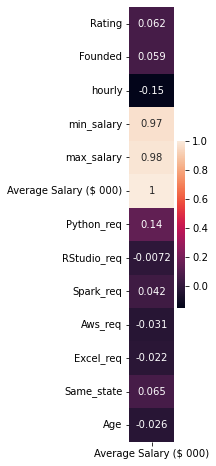

In [46]:
corr = pd.DataFrame(df.corr()['Average Salary ($ 000)'])
plt.figure(figsize=(1, 8))
sns.heatmap(corr, annot=True)

In [47]:
df.to_csv('dataset/data_eda.csv')